# **Matplotlib.pyplot**
***
1. [Overview](#Overview)
    1. [Introduction: matplotlib and pyplot](#Introduction:-matplotlib-and-pyplot)
    1. [Importing matplotlib.pyplot](#Importing-matplotlib.pyplot)
    1. [Quick plots using the procedural interface](#Quick-plots-using-the-procedural-interface)
    1. [Using the OO interface for greater flexibility](#Using-the-OO-interface-for-greater-flexibility)
1. [Some example plots](#Some-example-plots)
    1. [Scatterplot of geographical data](#Scatterplot-of-geographical-data)
    1. [Population pyramid](#Population-pyramid)
    1. [Ridgeline plot](#Ridgeline-plot)
1. [References](#References)


## Overview

### Introduction: matplotlib and pyplot

Matplotlib[1] is a popular python package for data visualisation. Developed since 2003 [2] as a way of making plots in python using a matlab like syntax. It is currently maintained and actively developed by a large community of open source developers.

Matplotlib features an object oriented interface at the base of which is the `Figure` class. A `Figure` can contain any number of subplots which are reified as objects of the `Axes` class. The `Axes` class provides many of the methods and fields that define the plot. 

Matplotlib.pyplot is a procedural wrapper around Matplotlib's object-oriented interface. The Matplotlib documentation recommends that, with the exception of a few functions that simplify intitialisation and saving of figures (`pyplot.figure`, `pyplot.subplot`, `pyplot.subplots`, and `pyplot.savefig`), the object oriented interface be used when programming, and the stateful pyplot interface be reserved for interactive work [3].

### Importing matplotlib.pyplot

The canonical alias for `matplotlib.pyplot` is `plt` and it is therefore imported by convention as follows (several other packages are imported here for use later in this notebook):


In [1]:
# import matplotlib.pyplot and assign alias 'plt'
import matplotlib.pyplot as plt

# other imports to support remainder of this notebook:
# Used in pop pyramid to remove minuses from ticklabels
import matplotlib.ticker as ticker 
# Used in the ridge plot to force tick labels to be shown
from matplotlib.ticker import MaxNLocator
# Used to organise grid in ridgeplot
import matplotlib.gridspec as gridspec
# Data management
import pandas as pd
# Numerical functions
import numpy as np

`plt.subplots` returns a `Figure` object and a tuple of `Axes` objects. The `Figure` object is a container for plots and the `Axes` objects that are returned are the plots it contains. `plt.subplots` takes two positional integer arguments, `nrows` and `ncols`. These parameters represent the number of subplots or `Axes` held in the `Figure` and their arrangement. The current figure can be accessed by calling `matplotlib.pyplot.gcf()` (gcf = GetCurrentFigure) and the current plot in that figure can be accessed by calling `matplotlib.pytplot.gcf().gca()` (gca = GetCurrentAxes).

### Quick plots using the procedural interface

The procedural interface is useful for producing basic plots quickly and are primarily useful for interactive work. For instance a series can be passed to plt.plot() for a quick line plot.

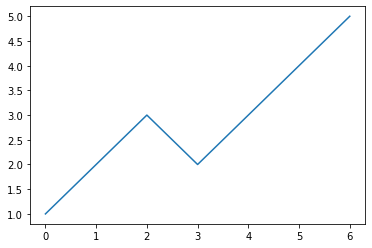

In [2]:
# A line plot in one line
plt.plot([1,2,3,2,3,4,5]);

Numerous plot types are available, for example:

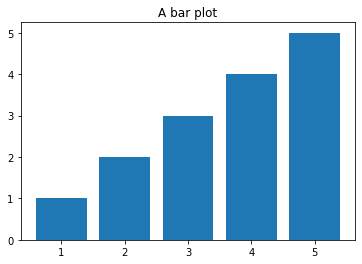

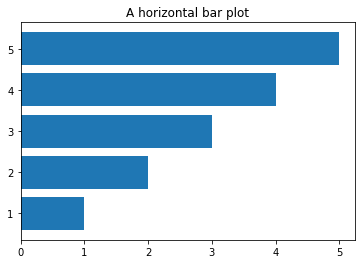

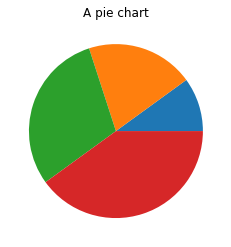

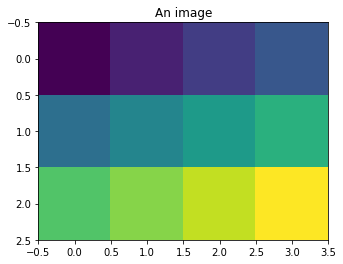

In [3]:
# Bar plot
plt.bar([1,2,3,4,5],[1,2,3,4,5])
plt.title("A bar plot")
plt.show()

# Horizontal bar plot
plt.barh([1,2,3,4,5],[1,2,3,4,5])
plt.title("A horizontal bar plot")
plt.show()

# Pie chart
plt.pie([1,2,3,4])
plt.title("A pie chart")
plt.show()

# Plot matrix as image
plt.imshow([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
plt.title("An image")
plt.show()

Also many statistical plots are also available. These are particularly useful when exploring new datasets:

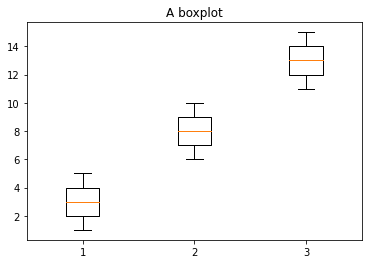

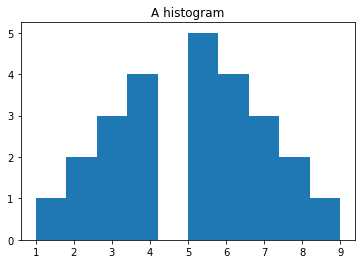

In [4]:
# Boxplot
plt.boxplot([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
plt.title("A boxplot")
plt.show()

# Histogram
plt.hist([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9])
plt.title("A histogram")
plt.show()

A plot is displayed with plt.show(). When plt.show() is called the current plot goes out of scope but before that, after the plot has been initalised, any call to one of plt's methods will adjust or add to the current plot. For Example, below, a plot is created then axis labels and a title are added:

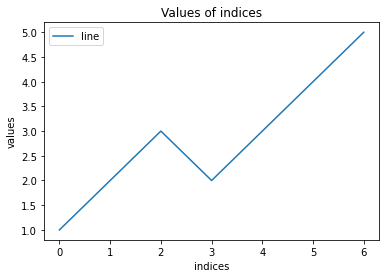

In [5]:
# A line plot with labels
# Generate the plot
plt.plot([1,2,3,2,3,4,5], label="line");

# if labels exist a legend can be created
plt.legend()

# The plot is still in scope and so can be adjusted
plt.xlabel("indices")
plt.ylabel("values")
plt.title("Values of indices")
plt.show()
# The plot is now out of scope and can no longer be adjusted
# any call to plt will start a new plot

A large range of functionality is available for generating quick plots using the pyplot procedural interface [4]. However, a much greater level of control over plot development can be achieved using the object-oriented interface.

### Using the OO interface for greater flexibility  

The pyplot OO interface allows near total control over all of the elements of the plot. It makes possible plots with multiple subplots, multiple plots in a single Axes (plot area), and multiple scales in a single plot. The usual way to create a plot when using the OO interface is `fig, ax = plt.subplots()`. `pyplot.subplots()` here returns a `Figure` object which is a container for the subplots (in this case there is only one), and an `Axes` which is the actual plot. If there were to be two subplots the figure might be initialised using `fig, (ax1, ax2) = pyplot.subplots(1, 2)`, where the numbers passed to `subplots()` are the numbers of rows and columns of subplots in the final figure. Now the subplots can be generated by calling the desired plotting method on the Axes held in ax1 and ax2, etc. 

The plot's components are accessed via getters and setters, so the axis labels, for instance are called with something like `ax.set_xlabel("xaxis")`. Below, a figure with two subplots is created:

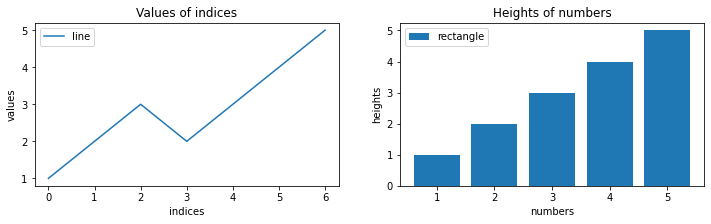

In [6]:
# Create a Figure with 2 Axes arranged in a single row
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,3)

# the first Axes will hold a line plot...
ax1.plot([1,2,3,2,3,4,5], label="line");
# ...and the scond will hold a bar plot
ax2.bar([1,2,3,4,5],[1,2,3,4,5], label='rectangle')

#Set the axis labels and titles for each Axes
ax1.set_xlabel("indices")
ax2.set_xlabel("numbers")
ax1.set_ylabel("values")
ax2.set_ylabel("heights")
ax1.set_title("Values of indices")
ax2.set_title("Heights of numbers")

# Use plot calls' label attribute to display legends
ax1.legend()
ax2.legend()
# Show the plot. 
# plt no longer points to the plot after this call
plt.show()

## Some example plots


### Scatterplot of geographical data

This plot was inspired by an example using the *California Housing Prices* dataset - a common tutorial dataset in the machine learning community - found in the book *Hands-on Learning with Scikit-Learn, Keras & TensorFlow*[5]. The idea is to plot a point dataset that has geographical dimension, such as longitude and latitude attributes, and to produce a scatter plot using the geographical coordinates as *x* and *y* and displaying variations in other attributes using colour and symbol size. In order to prepare a dataset for this plot, a [shapefile](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm) [6] of Irelands [electoral divisions](https://census.cso.ie/censusasp/saps/boundaries/eds_bound.htm) [7] was downloaded from the CSO website and the centroids extracted using [QuantumGIS](https://www.qgis.org/en/site/) [8]. Small area population statistics - a CSO census derived data product containing demographic statistics at the electoral division level - were downloaded as csv files and loaded into pandas dataframes where the total population for each of those years was extracted and joined to the centroid dataset using the electoral division ID as a key. Finally, the data was plotted as a scatterplot with each datapoint represented by a circle, the size of which was determined by the absolute change in population in that ED between 2011 and 2016. The colour indicates whether the population has fallen or risen.

Note that the procedural pyplot interface is used during development of this plot but the final plot is produced using the OO interface.

In the following two cells, the prepared ED centroids csv file is loaded from disc, cleaned up a little, and its contents checked.

In [7]:
# Read ED centroid data into pandas dataframe
eds = pd.read_csv('data/ed_centroids.csv')
eds.head()

,X,Y,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,CSOED,OSIED,EDNAME,LAND_AREA,TOTAL_AREA
0,236368.456056,286670.682399,IE0,Ireland,IE01,"Border,Midland and Western",IE011,Border,32,Cavan County,32090,027053,Kilcogy,17.793398,17.838415
1,296984.205766,180513.893740,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01004,017022,Hacketstown,22.068904,22.068904
2,292582.032469,178524.343479,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01005,017023,Haroldstown,11.543112,11.543112
3,284014.641367,180190.200539,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01006,017029,Kineagh,18.033035,18.033035
4,286425.977882,183194.215360,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01007,017038,Rahill,16.431779,16.431779


In [8]:
# Rename ED ID column to make it easier to join with other data
eds['ID'] = eds['CSOED']
# Set the dataframe index to be the ED ID column
eds.set_index('ID', inplace=True)
# Cull unnecessary columns
eds = eds[['X', 'Y', 'COUNTYNAME', 'LAND_AREA']]
# Check the data
eds.head()

,X,Y,COUNTYNAME,LAND_AREA
ID,,,,
32090,236368.456056,286670.682399,Cavan County,17.793398
01004,296984.205766,180513.893740,Carlow County,22.068904
01005,292582.032469,178524.343479,Carlow County,11.543112
01006,284014.641367,180190.200539,Carlow County,18.033035
01007,286425.977882,183194.215360,Carlow County,16.431779


Get data to join with ED centroids for scatterplot. Small Area Population Statistics from CSO website [9]

In [9]:
# 2016 SAPS
saps2016_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_ED3409.csv'

# 2016 Key
# https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS_2016_Glossary.xlsx

# 2011 SAPS
saps2011_url = 'https://www.cso.ie/en/media/csoie/census/documents/saps2011files/AllThemesTablesED.csv'

# 2011 Key
# https://www.cso.ie/en/media/csoie/census/documents/saps2011files/Theme,breakdown.xlsx

The 2016 SAPS CSV file has an unusual encoding and produces errors when imported using pandas.read_csv(). This is avoided by specifying the encoding as 'cp1252'. For the purposes of the present demonstration the statistic of interest is total population per ED. The correct column ('T1_1AGETT') is identified using the key linked to above. The file also imports numeric columns as dtype('object') and inserts commas as thousand separators. This is corrected using `pandas.to_numeric` and `pandas.Series.str.replace()`. The correctly formatted data is stored in a new column `Pop2016`.

In [10]:
# Download 2016 SAPS data at ED level and extract ID column and Total Population column
saps2016 = pd.read_csv(saps2016_url, encoding='cp1252', usecols=['GEOGID', 'T1_1AGETT'])
# Remove commas and cast Total Population column to numeric dtype. 
saps2016['Pop2016'] = pd.to_numeric(saps2016['T1_1AGETT'].str.replace(',', ''))
# Rename GEOGID column to ID and remove ED3409_ prefix
saps2016['ID'] = saps2016['GEOGID'].str.replace("ED3409_", "")
# Make ED ID column the index
saps2016.set_index('ID', inplace=True)
# Drop unneeded columns
saps2016 = saps2016.drop(['GEOGID', 'T1_1AGETT'], axis=1)
saps2016.head()

,Pop2016
ID,
01001,4560
01002,1405
01003,526
01004,1117
01005,296


The 2016 data looks good. Next the 2011 data is loaded and cleaned:

In [11]:
# Download and clean up 2011 SAPS data
saps2011 = pd.read_csv(saps2011_url, usecols=['GEOGID', 'T1_1AGETT'])
saps2011['ID'] = saps2011['GEOGID'].str.replace('E', '')
saps2011.set_index('ID', inplace=True)
saps2011 = saps2011.drop(['GEOGID'], axis=1)
saps2011.rename(columns={'T1_1AGETT':'Pop2011'}, inplace=True)
saps2011.head()


,Pop2011
ID,
01001,4181
01002,1272
01003,560
01004,1091
01005,259


Having checked the 2011 data, the 2016 and 2011 datasets are now joined.

In [12]:
# Join the 2011 and 2016 population dataframes with ED centroids
pop = saps2016.join(saps2011.join(eds))
# Calculate population change between the two periods
pop['Pop Change'] = pop['Pop2016'] - pop['Pop2011']
# Create boolean column for whether the population change is positive or negative
pop['Up'] = pop['Pop Change'] > 0
# Calculate the percentage change
pop['Percent Change'] = (pop['Pop Change'] / pop['Pop2011']) * 100
pop.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
01001,4560,4181,272309.810746,176747.582960,Carlow County,1.807095,379,True,9.064817
01002,1405,1272,271535.112431,176812.764683,Carlow County,0.475506,133,True,10.455975
01003,526,560,295660.775229,176254.594475,Carlow County,28.136881,-34,False,-6.071429
01004,1117,1091,296984.205766,180513.893740,Carlow County,22.068904,26,True,2.383135
01005,296,259,292582.032469,178524.343479,Carlow County,11.543112,37,True,14.285714


Note the use of the procedural interface below. It is ideal for quickly producing plots while making adjustments.

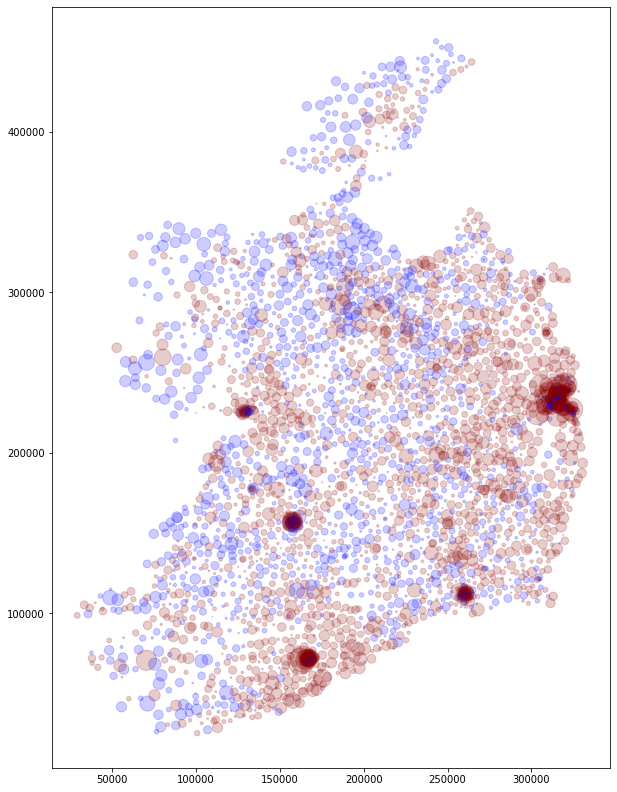

In [13]:
# Create scatterplot with long and lat values of centroids on X and Y axes
# and direction of pop change as colour 
# and size of symbol as size of pop change
plt.figure(figsize=(10, 14))
plt.scatter(x=pop['X'], y=pop['Y'], alpha=0.2, 
            # Rising = red, falling = blue
            c=np.where(pop['Up'], 'darkred', 'blue'), 
            # symbol size = pop change x 10
            s=abs(pop['Percent Change'] * 10))
plt.show()

There's a lot of confusion in high density areas with many small EDs, i.e. in the urban centres of Dublin, Cork, Limerick, Galway, and Waterford. Changing the drawing order might help to remedy that. The drawing order can be changed simply by changing the order of values in the DataFrame.

In [14]:
# Sort the dataframe by percent pop change
sorted_pop = pop.sort_values(by='Percent Change', key=abs, ascending=False)
sorted_pop.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
18078,364,217,162593.506203,69924.028146,Cork County,1.381605,147,True,67.741935
17006,2223,1326,164065.756407,71164.975483,Cork City,1.579302,897,True,67.647059
04005,3113,1966,320062.137892,242239.885538,Fingal,10.378176,1147,True,58.341811
04015,3257,2112,305723.025825,241432.087409,Fingal,3.929437,1145,True,54.214015
05049,2886,1884,323703.272575,227091.949056,Dún Laoghaire-Rathdown,0.611499,1002,True,53.184713


The population DataFrame is now sorted by absolute population change so the largest symbols will be drawn first and the smaller ones later. This gives a better idea of what's going on in dense areas. Again, note the use of the procedural interface.

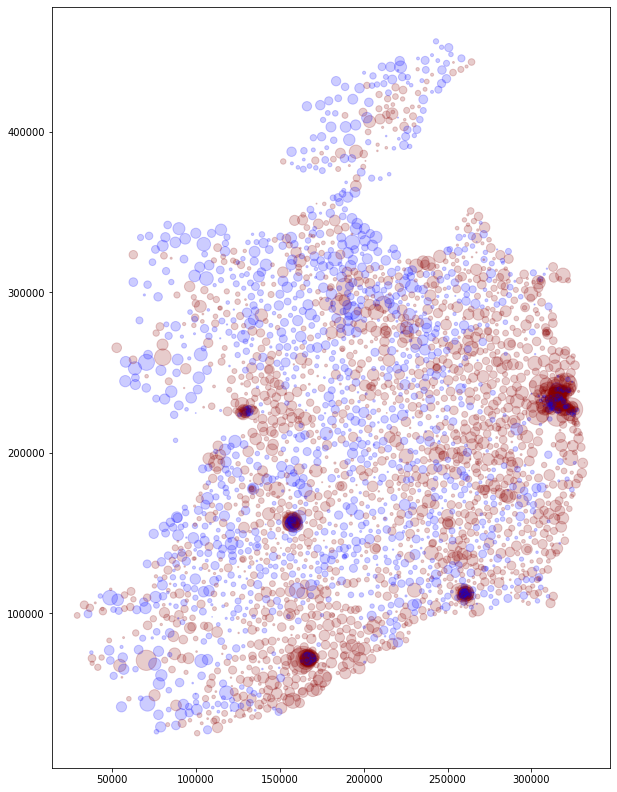

In [15]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 14))
plt.scatter(x=sorted_pop['X'], y=sorted_pop['Y'], alpha=0.2, 
            # Rising = red, falling = blue
            c=np.where(sorted_pop['Up'], 'darkred', 'blue'), 
            # symbol size = pct change x 10
            s=abs(sorted_pop['Percent Change'] * 10))
plt.show()

So far the plots are showing percent population change. It would be interesting to see absolute change. Here, a figure with two Axes is produced using the object-oriented pyplot interface:

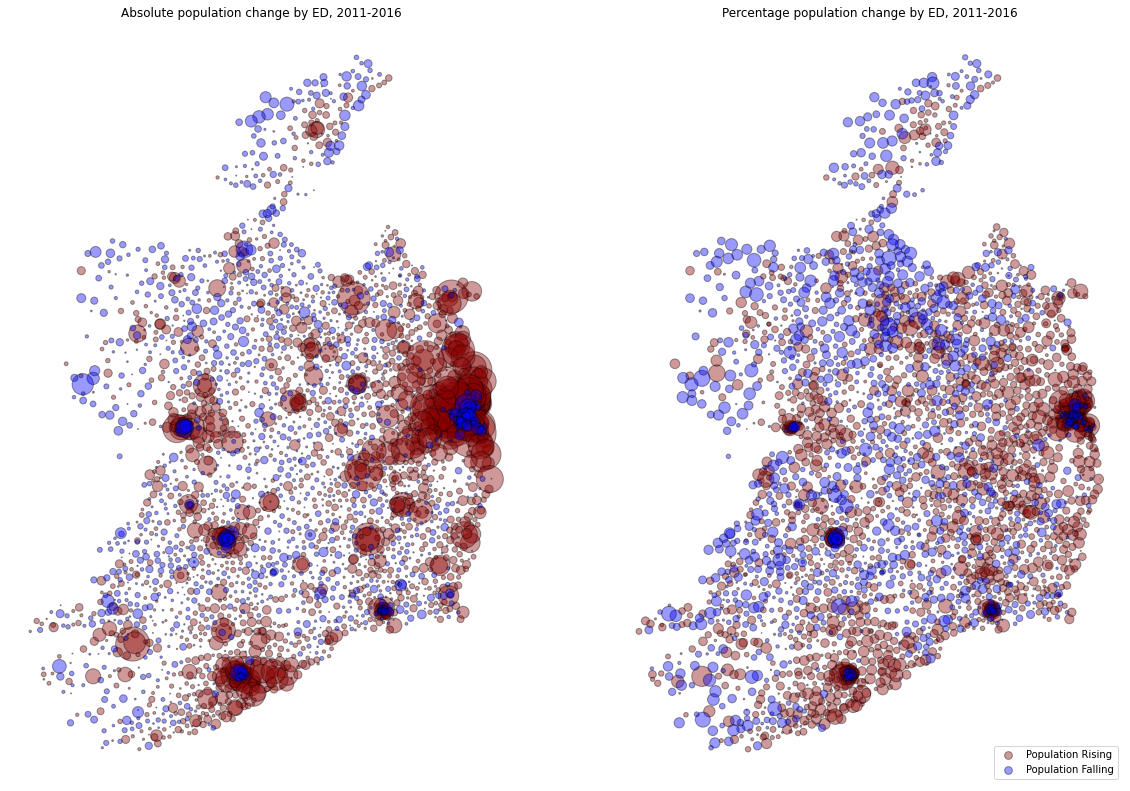

In [16]:
# Set the figure size
plt.rcParams["figure.figsize"] = [20,14]

# Two plots on one row
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the rising an falling points separately so they can be styled differently
for rising in [True, False]:
    
    # For the legend
    label = "Population Rising" if rising else "Population Falling"
    colour = 'darkred' if rising else 'blue'
    
    # Collect long and lat of the points to be plotted
    x = pop[pop['Up'] == rising]['X']
    y = pop[pop['Up'] == rising]['Y']
    
    # Circle size
    scale1 = abs(pop[pop['Up'] == rising]['Pop Change'])
    # Percent Change circle size is exagerated to make differences easier to see
    scale2 = abs(pop[pop['Up'] == rising]['Percent Change'] * 10)
    
    # The plots
    ax1.scatter(x=x, y=y, c=colour, s=scale1, label=label,
               alpha=0.4, edgecolors='black')
    ax2.scatter(x=x, y=y, c=colour, s=scale2, label=label,
               alpha=0.4, edgecolors='black')

    # Remove the axes
    ax1.axis('off')
    ax2.axis('off')

    # Set the titles
    ax1.set_title('Absolute population change by ED, 2011-2016')
    ax2.set_title('Percentage population change by ED, 2011-2016')

    
# The subplots can share a legend
lgd = ax2.legend(loc='lower right')

# Set legend symbol sizes: https://stackoverflow.com/a/43578952
for handle in lgd.legendHandles:
    handle.set_sizes([60])

plt.show()

It's a little difficult to see what's happening in the cities. Here the counties that make up Dublin city are used to subset just that part of the dataset.

In [17]:
dublin_city = ['Dublin City', 'South Dublin', 'Fingal', 'Dún Laoghaire-Rathdown', ]
pop_dub = pop[pop['COUNTYNAME'].isin(dublin_city)]
pop_dub.head()

,Pop2016,Pop2011,X,Y,COUNTYNAME,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,,
02001,1785,1555,314954.359900,235626.342740,Dublin City,0.153259,230,True,14.790997
02002,4166,3861,314583.969417,235181.362417,Dublin City,0.759390,305,True,7.899508
02003,4471,4170,314460.904380,234451.153668,Dublin City,0.361038,301,True,7.218225
02004,3109,3218,313749.570639,234765.809471,Dublin City,0.345295,-109,False,-3.387197
02005,3293,3037,314053.246964,235028.010188,Dublin City,0.264512,256,True,8.429371


The cities can then be plotted separately. Dublin is shown as an example.

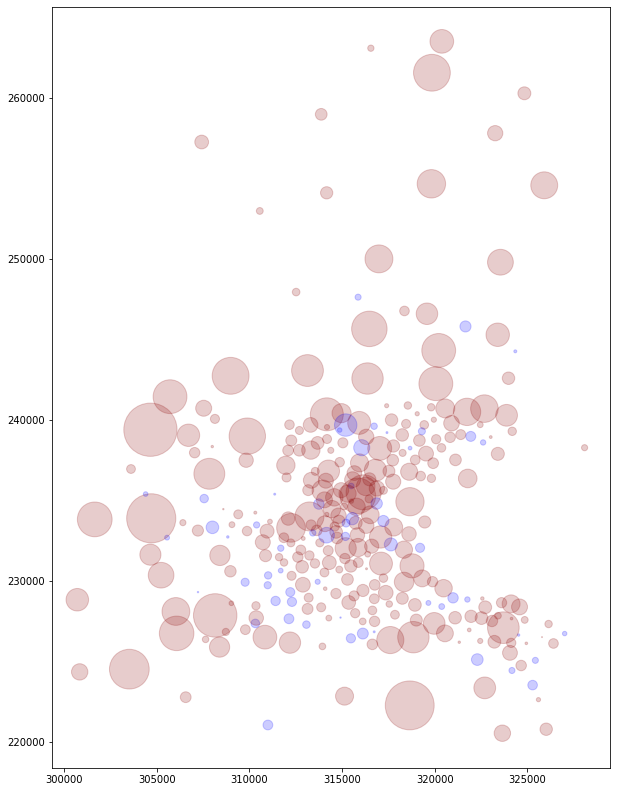

In [18]:
plt.figure(figsize=(10, 14))
plt.scatter(x=pop_dub['X'], y=pop_dub['Y'], alpha=0.2, 
            c=np.where(pop_dub['Up'], 'darkred', 'blue'), 
            s=abs(pop_dub['Pop Change']))
plt.show()

### Population pyramid

A population pyramid is a a horizontal bar plot showning two series opposite one another. It is commonly used to illustrate distribution of populations by age group and gender. Here, the population statistics from the 2016 census, this time at province level, are visualised using a population pyramid.

The SAPS are released with per year population counts for persons below the age of 20, and the counts for persons over the age of 20 aggregated into 5-year groups. For consistency, the young peoples' counts are aggregated into 5-year groups too. The process of downloading and processing the SAPS data is defined in a function here because the same code will be used later in this notebook to download and process the county-level SAPS data.

In [19]:
def extract_cso_pop(url):

    # Age by gender columns
    y_cols = []
    a_cols = []
    # Generate lists of wanted column names
    for g in ('M', 'F', 'T'):
        # Young peoples' data needs extra processing so keep it separate for now
        # young people columns
        y_cols += [['T1_1AGE' + str(i) + g for i in range(20)]]
        # adult columns
        a_cols += [['T1_1AGE' + str(i) + '_' + str(i + 4) + g for i in range(20, 81, 5)] + ['T1_1AGEGE_85' + g]]

    # Read the data into 2 lists of dataframes
    y_data = []
    a_data = []
    for col in range(3):
        y_data += [pd.read_csv(url, encoding='cp1252', usecols=y_cols[col], thousands=',', dtype=np.int32)]
        a_data += [pd.read_csv(url, encoding='cp1252', usecols=a_cols[col], thousands=',', dtype=np.int32)]

    # Get boundary names from csv file
    boundary_names = pd.read_csv(url, encoding='cp1252', usecols=['GEOGID', 'GEOGDESC'])

    # Aggregate the youth data so it is grouped the same as the adult data
    g = ['M', 'F', 'T']
    for i in range(3):
        for j in range(0, 20, 5):
            y_data[i]['T1_1AGE' + str(j) + '_' + str(j + 4) + g[i]] = y_data[i].iloc[:,j:j+5].sum(axis=1)
        y_data[i] = y_data[i].iloc[:,-4:]

    # Create final separate male, female, and total DataFrames
    males = pd.concat([y_data[0], a_data[0]], axis=1)
    females = pd.concat([y_data[1], a_data[1]], axis=1)
    totals = pd.concat([y_data[2], a_data[2]], axis=1)

    # return dataframes in tuple
    return (males, females, totals, boundary_names)

The population data is downloaded, and uniformly aggregated. Province names are extracted to a list.

In [20]:
# URL of SAPS at province level
prov_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_PROV.csv'
males, females, _, provinces = extract_cso_pop(prov_url)
# Extract province names
provinces = provinces['GEOGDESC'].tolist()

Here, the population pyramid is created. This is achieved by plotting the female data as a normal horizontal bar plot, then plotting the male data, negated so the bars run in the opposite direction, as a second series on the same plot. When the data is added to the plot the values for all four provinces are summed so that total population is represented.

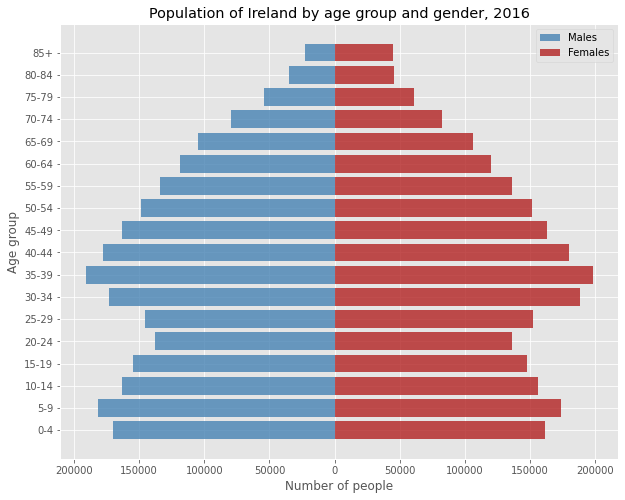

In [21]:
# Generate labels
labels = [l.partition("T1_1AGE")[2].partition("M")[0].
          replace('_','-').replace('GE-', '') 
          for l in males.columns]
labels[-1] += '+'

plt.rcParams["figure.figsize"] = [10,8]
with plt.style.context('ggplot'):

    fig, ax = plt.subplots()

    # add the males data to the plot, 
    # negated so it stretches from the y-axis to the left
    ax.barh(labels, -males.sum(), color='steelblue', 
            alpha=0.8, label='Males')
    # add the females data
    ax.barh(labels, females.sum(), color='firebrick', 
            alpha=0.8, label='Females')

    # Format xtick labels so that males dont have negative values
    # see https://stackoverflow.com/a/51087117
    @ticker.FuncFormatter
    def major_formatter(x, pos):
        label = str(int(-x)) if x < 0 else str(int(x))
        return label

    ax.xaxis.set_major_formatter(major_formatter)

    ax.set_xlabel('Number of people')
    ax.set_ylabel('Age group')
    ax.set_title('Population of Ireland by age group and gender, 2016')
    
    ax.legend()
    plt.show()    

Here, the provinces are plotted separately by iterating through four declared Axes and adding different data to each one:

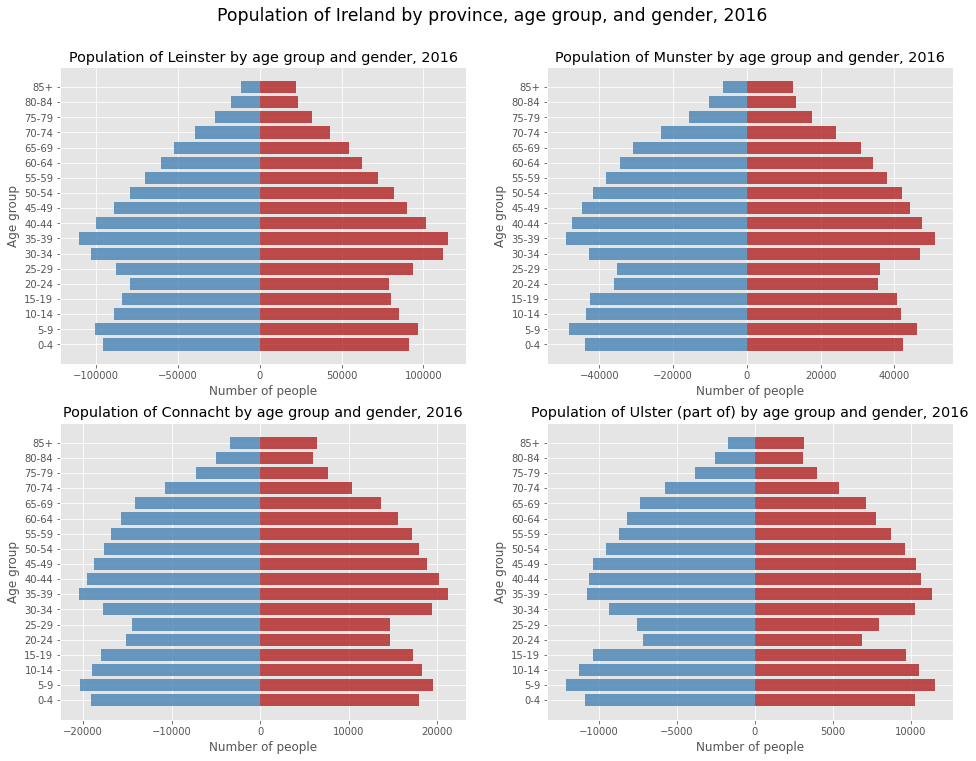

In [22]:
plt.rcParams["figure.figsize"] = [16,12]
with plt.style.context('ggplot'):

    # Set up 4 Axes in a 2x2 grid
    fig, axs = plt.subplots(2,2)

    # Iterate through Axes, drawing a different plot in each
    for i, ax in enumerate(axs.ravel()):

        # Take just the current province's row
        males_prov = males.iloc[i,:]
        females_prov = females.iloc[i,:]

        # Plot teh bars
        ax.barh(labels, -males_prov, color='steelblue', alpha=0.8, label='Males')
        ax.barh(labels, females_prov, color='firebrick', alpha=0.8, label='Females')

        # Subplot labels and titles
        ax.set_xlabel('Number of people')
        ax.set_ylabel('Age group')
        ax.set_title(f"Population of {provinces[i]} by age group and gender, 2016")

    # Figure title
    plt.suptitle("Population of Ireland by province, age group, and gender, 2016", 
                 y=0.95, fontsize='xx-large')
    plt.show()

### Ridgeline plot

A ridgeline plot is a series of stacked KDE plots; plots which show the distribution of a variable [10]. Here a ridgeline plot is produced showing the density estimates for county-level population data by age groups. The data is preprocessed so that the percent of total population occupied by each age group category is represented. It is not certain that this is a good use of KDE plots, and as will be seen, the visualisation produced is difficult to interpret and as such, this may not be a very successful visualisation. However, it is an excellent demonstration of the flexibility of matplotlib as a dat visualisation platform.

In the cell below, `extract_cso_pop` function defined previously is used to download and preprocess the county-level SAPS data from the CSO website.

In [23]:
co_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_CTY31.csv'

# Only the total population in each age group is needed 
# so male and female data are discarded
_, _, totals, counties = extract_cso_pop(co_url)

# County names to list
counties = counties['GEOGDESC'].tolist()
# Truncate excessively long county names
counties = [' '.join(county.split(' ')[0:2]) for county in counties]

# Recalculate each value as percent of the row it occupies 
totals = totals.div(totals.sum(axis=1), axis=0).multiply(100)

The next cell sorts the rows in the data frame by total percentage of population less than 20. So the first plot to be drawn will be the county with the lowest percentage of young people, and the last will be the one with the highest.

In [24]:
# Create temporary column to hold values to sort by
totals['young'] = totals['T1_1AGE0_4T'] + totals['T1_1AGE5_9T'] + totals['T1_1AGE10_14T'] + totals['T1_1AGE15_19T']
# Sort dataframe by temporary column then drop column
totals_s = totals.sort_values(by=[ 'young']).drop('young', axis=1)
# Reorder county names list to match new order
counties_s = [counties[i] for i in totals_s.index]

The ridgeline plot is produced below. Developement of this plot relied heavily on a matplotlib blog post [11]. The plot is produced by creating a number of stacked subplots and drawing them very close together so that they overlap, then removing axes and backgrond patches, and adjusting the alpha of the plotted series so that plots lying below are not obscured by those above them. The result can be quite striking and informative. Here, however, it is unclear what the chart is telling us, if anything. The order in which the plots are drawn can affect its interpretation, but it is difficult to know what to order by - there is no clear order in a list of places like there would be for a list of dates. Also KDE is a method useful for datasets with a lot of individual points, not an already aggregated one like this one. In this case the plots are ordered by percent of total population represented by young people (under 20).

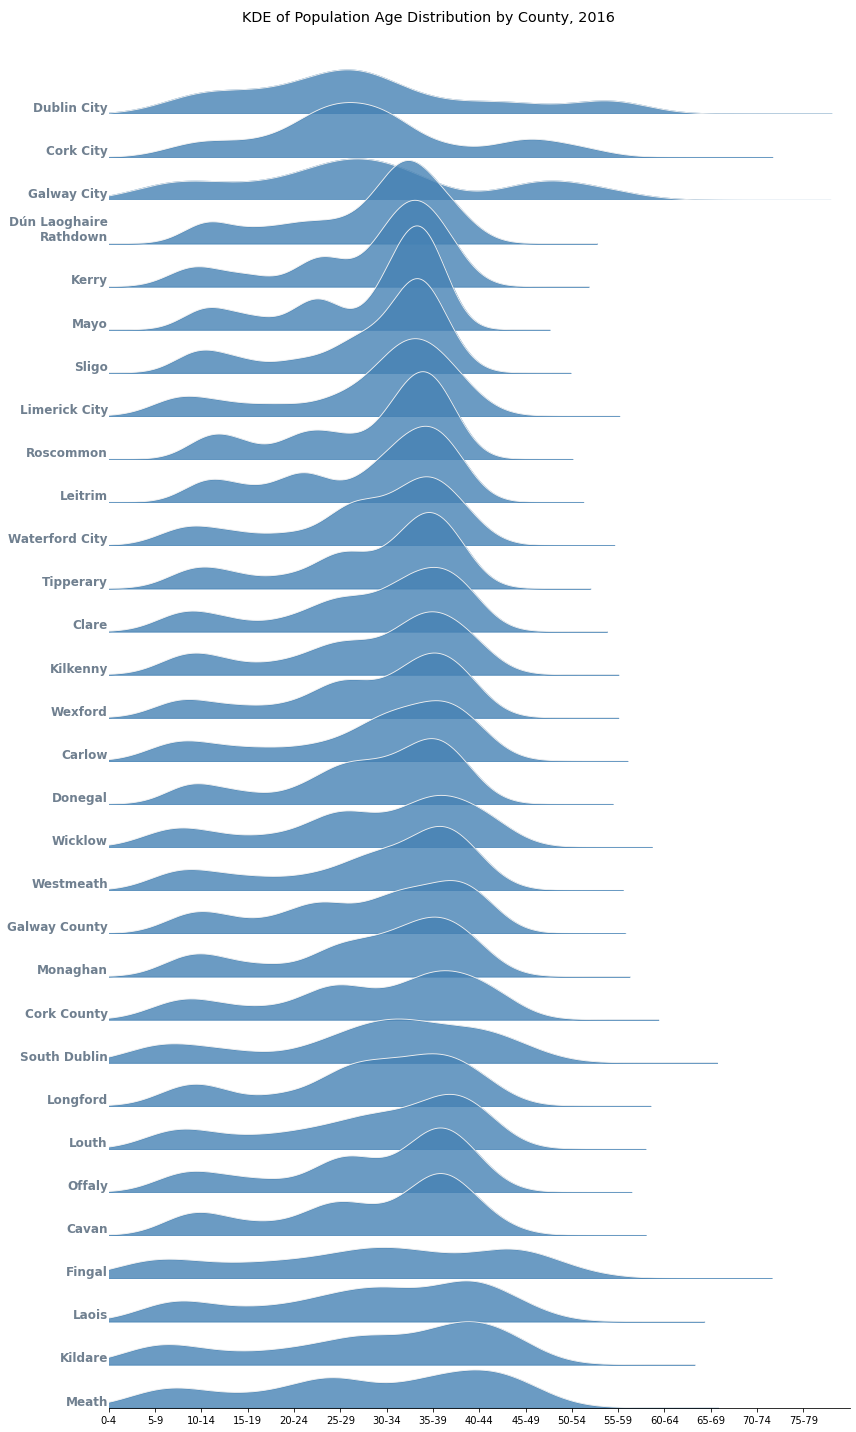

In [25]:
# Initialise layout with a subplot for each county
gs = (gridspec.GridSpec(len(counties),1))
#set the figure size
fig = plt.figure(figsize=(12,20))

# A list to hold the Axes
axs = []
# Each plot represents a county
for i, county in enumerate(counties_s):
    
    # New Axes
    axs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # Generate the KDE plot from the current row
    plot = totals_s.iloc[i].plot.kde(ax=axs[-1], bw_method=0.3, color="#f0f0f0", lw=0.9)

    # Get data from plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # an fill space underneath
    axs[-1].fill_between(x,y,color='steelblue', alpha=0.8)

    # Keep plots on the same scale
    axs[-1].set_xlim(0, 16)
    axs[-1].set_ylim(0, 0.45)

    # Remove background patches
    rect = axs[-1].patch
    rect.set_alpha(0)

    # Remove the axes
    for ax in axs:
        ax.axis('off')

    # Show x-axis on bottom subplot
    if i == len(counties)-1:
        ax = axs[i]
        # Turn axis back on
        ax.axis('on')
        # Remove spines and y-axis
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        # Label x-axis
        ax.xaxis.set_ticks(range(16))
        ax.set_xticklabels(labels[:16])

    # DL-Rathdown is too long
    county = county.replace("-","\n")
    # Add county labels
    axs[-1].text(-0.02,0,county,fontsize=12, fontweight='bold', 
                 ha="right", va="bottom", color='slategray')

# Format the subplots so they overlap
plt.tight_layout()
gs.update(hspace= -0.6)
plt.suptitle('KDE of Population Age Distribution by County, 2016', y=0.99, fontsize='x-large')
plt.show()

## References

[1] Hunter, J. D., 2007, *Matplotlib: A 2D Graphics Environment*, Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95.

[2] Matplotlib Development Team, 2021, *History* [online]. Available at https://matplotlib.org/stable/users/project/history.html. Accessed 20-12-21.

[3] Matplotlib Development Team, 2021, *matplotlib.pylot* [online]. Available at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html. Accessed 20-12-21.

[4] Matplotlib Development Team, 2021, *Pyplot function overview* [online]. Available at https://matplotlib.org/stable/api/pyplot_summary.html. Accessed 20-12-21.

[5] Géron, A., 2019, *Hands-on machine learning with Scikit-Learn, Keras, & TensorFlow*, O' Reilly: Sebastopol, p. 36.

[6] ESRI, 2021, *What is a shapefile?* [online]. Available at https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm. Accessed 20-12-2021.

[7] Central Statistics Office, 2021, *Electoral division boundaries* [online]. Available at https://census.cso.ie/censusasp/saps/boundaries/eds_bound.htm. Accessed 30-12-21.

[8] QGIS Developers, 2021, *QGIS - The leading open source desktop GIS* [online]. Available at https://www.qgis.org/en/site/about/index.html. Accessed 303-12-2021.

[9] Central Statistics Office, 2021, *Census 2016 small area population statistics* [online]. Available at https://www.cso.ie/en/census/census2016reports/census2016smallareapopulationstatistics/. Accessed 30-12-21.

[10] Scikit Learn Developers, 2021, *Kernel density estimation*, [online]. Available at https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation. Accessed 30-12-21.

[11] McKeever, P., 2020, *Create ridgeplots in matplotlib*, [online]. Available at https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/. Accessed 30-12-21.